# Exploratory Data Analysis (EDA)

## 1. Introduction

### Data Storytelling

The Data Science field has expanded significantly in recent years, leading to changes in wages and working conditions. It is important to understand how data science salaries correlate with various socio-economic indicators internationally. This research will help identify the relationship between professionals' income levels, countries' economic conditions and the quality of life of the population and help professionals and organizations make informed career and salary decisions.


### Dataset Description:
The Dataset provides valuable insights into the compensation trends and variations in the field of data science from 2020 to 2024, and a wealth of information about all countries worldwide, covering a wide range of indicators and attributes. It encompasses demographic statistics, economic indicators, environmental factors, healthcare metrics, education statistics, and much more.

## 2. Import Libraries

In [70]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
sns.set(style='ticks')
from scipy.stats import norm

## 3. Data Collection

###  Sourcing and loading

Import the data into the working environment

In [9]:
salaries = pd.read_csv('/Users/juliabolgova/Documents/GitHub/CapstoneProject/data/interim/salaries.csv')

In [11]:
salaries.head()

,Unnamed: 0,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,...,11.1,2.61,328239523.0,62.0,9.6,36.6,14.7,270663028.0,37.09024,-95.712891
1,1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,...,11.1,2.61,328239523.0,62.0,9.6,36.6,14.7,270663028.0,37.09024,-95.712891
2,2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,...,11.1,2.61,328239523.0,62.0,9.6,36.6,14.7,270663028.0,37.09024,-95.712891
3,3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,...,11.1,2.61,328239523.0,62.0,9.6,36.6,14.7,270663028.0,37.09024,-95.712891
4,4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,...,11.1,2.61,328239523.0,62.0,9.6,36.6,14.7,270663028.0,37.09024,-95.712891


In [13]:
# Reset the index without adding it as a new column
salaries = salaries.reset_index(drop=True) 

In [15]:
# Drop column 'Unnamed: 0' 
if 'Unnamed: 0' in salaries.columns:
    salaries = salaries.drop(columns=['Unnamed: 0'])
salaries.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,...,11.1,2.61,328239523.0,62.0,9.6,36.6,14.7,270663028.0,37.09024,-95.712891
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,...,11.1,2.61,328239523.0,62.0,9.6,36.6,14.7,270663028.0,37.09024,-95.712891
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,...,11.1,2.61,328239523.0,62.0,9.6,36.6,14.7,270663028.0,37.09024,-95.712891
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,...,11.1,2.61,328239523.0,62.0,9.6,36.6,14.7,270663028.0,37.09024,-95.712891
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,...,11.1,2.61,328239523.0,62.0,9.6,36.6,14.7,270663028.0,37.09024,-95.712891


In [17]:
# Examine the data types of our dataset
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5702 entries, 0 to 5701
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Job Title                                  5702 non-null   object 
 1   Employment Type                            5702 non-null   object 
 2   Experience Level                           5702 non-null   object 
 3   Expertise Level                            5702 non-null   object 
 4   Salary                                     5702 non-null   int64  
 5   Salary Currency                            5702 non-null   object 
 6   Company Location                           5702 non-null   object 
 7   Salary in USD                              5702 non-null   int64  
 8   Employee Residence                         5702 non-null   object 
 9   Company Size                               5702 non-null   object 
 10  Year                    

## 4. Data Cleaning

My opinion is that some columns are not necessary for our analysis

In [21]:
# Exclude some columns from data 

salaries = salaries.drop(["Salary", "Longitude", "Latitude", "Out of pocket health expenditure", "Physicians per thousand", \
                   "Maternal mortality ratio", "Largest city", "Infant mortality", "Gasoline Price", \
                   "Forested Area (%)", "Currency-Code", "Co2-Emissions", "Capital/Major City", "Calling Code", \
                   "Birth Rate", "Armed Forces size",  "Land Area(Km2)", "Agricultural Land( %)", "Land Area(Km2)", "Abbreviation"
                  ], axis=1)

In [23]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5702 entries, 0 to 5701
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Job Title                                  5702 non-null   object 
 1   Employment Type                            5702 non-null   object 
 2   Experience Level                           5702 non-null   object 
 3   Expertise Level                            5702 non-null   object 
 4   Salary Currency                            5702 non-null   object 
 5   Company Location                           5702 non-null   object 
 6   Salary in USD                              5702 non-null   int64  
 7   Employee Residence                         5702 non-null   object 
 8   Company Size                               5702 non-null   object 
 9   Year                                       5702 non-null   int64  
 10  Country                 

In [25]:
# Checking NaN
missing_salaries = pd.concat([salaries.isnull().sum(), 100 * salaries.isnull().mean()], axis=1)
missing_salaries.columns = ['count', '%']
missing_salaries = missing_salaries.sort_values(by='count', ascending=False)
missing_salaries

,count,%
Job Title,0,0.0
Fertility Rate,0,0.0
Unemployment rate,0,0.0
Total tax rate,0,0.0
Tax revenue (%),0,0.0
Population: Labor force participation (%),0,0.0
Population,0,0.0
Official language,0,0.0
Minimum wage,0,0.0
Life expectancy,0,0.0


In [27]:
# Checking Duplicates
duplicates_salaries = salaries.duplicated().sum()
print("\nNumber of duplicates:", duplicates_salaries)


Number of duplicates: 0


In [108]:
salaries.describe()

,Salary in USD,Year,Density\n(P/Km2),CPI,CPI Change (%),Fertility Rate,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Life expectancy,Minimum wage,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
count,5702.000000,5702.000000,5702.000000,5702.000000,5702.000000,5702.000000,5.702000e+03,5702.000000,5702.000000,5702.000000,5702.000000,5.702000e+03,5702.000000,5702.000000,5702.000000,5702.000000,5.702000e+03
mean,144741.569625,2022.745528,71.798492,118.800275,6.495300,1.723297,1.757353e+13,101.936671,83.488934,78.812873,7.362727,2.867592e+08,61.870800,11.478885,36.792073,12.913206,2.299222e+08
std,70761.933640,0.642548,260.271392,12.705802,2.756502,0.209104,7.750213e+12,1.930735,12.508975,2.072820,1.661336,1.514810e+08,2.184397,4.752059,5.820355,3.886823,9.256504e+07
min,15000.000000,2020.000000,3.000000,99.550000,-1.900000,1.140000,2.220307e+09,84.700000,3.000000,52.800000,0.250000,5.026530e+05,41.200000,0.100000,11.300000,0.090000,4.759020e+05
25%,93725.000000,2023.000000,36.000000,117.240000,7.500000,1.730000,2.142770e+13,101.800000,88.200000,78.500000,7.250000,3.282395e+08,62.000000,9.600000,36.600000,14.700000,2.706630e+08
50%,137500.000000,2023.000000,36.000000,117.240000,7.500000,1.730000,2.142770e+13,101.800000,88.200000,78.500000,7.250000,3.282395e+08,62.000000,9.600000,36.600000,14.700000,2.706630e+08
75%,185000.000000,2023.000000,36.000000,117.240000,7.500000,1.730000,2.142770e+13,101.800000,88.200000,78.500000,7.250000,3.282395e+08,62.000000,9.600000,36.600000,14.700000,2.706630e+08
max,750000.000000,2024.000000,8358.000000,288.570000,53.500000,5.390000,2.142770e+13,126.600000,136.600000,84.200000,13.590000,1.397715e+09,86.800000,37.200000,106.300000,28.180000,8.429340e+08


The dataset contains 5702 records from 2020 to 2024, with an average salary of $144,741 USD. The data reveals significant variability in salaries, economic indicators, education, and health across different regions, highlighting the diverse socio-economic conditions influencing data science professionals’ earnings. The year 2024 was not deeply analyzed due to limited data.

In [125]:
# Save new Dataset 
salaries.to_csv('/Users/juliabolgova/Documents/GitHub/CapstoneProject/data/interim/salariesEDA.csv', index=True)

## 5. Data Exploration

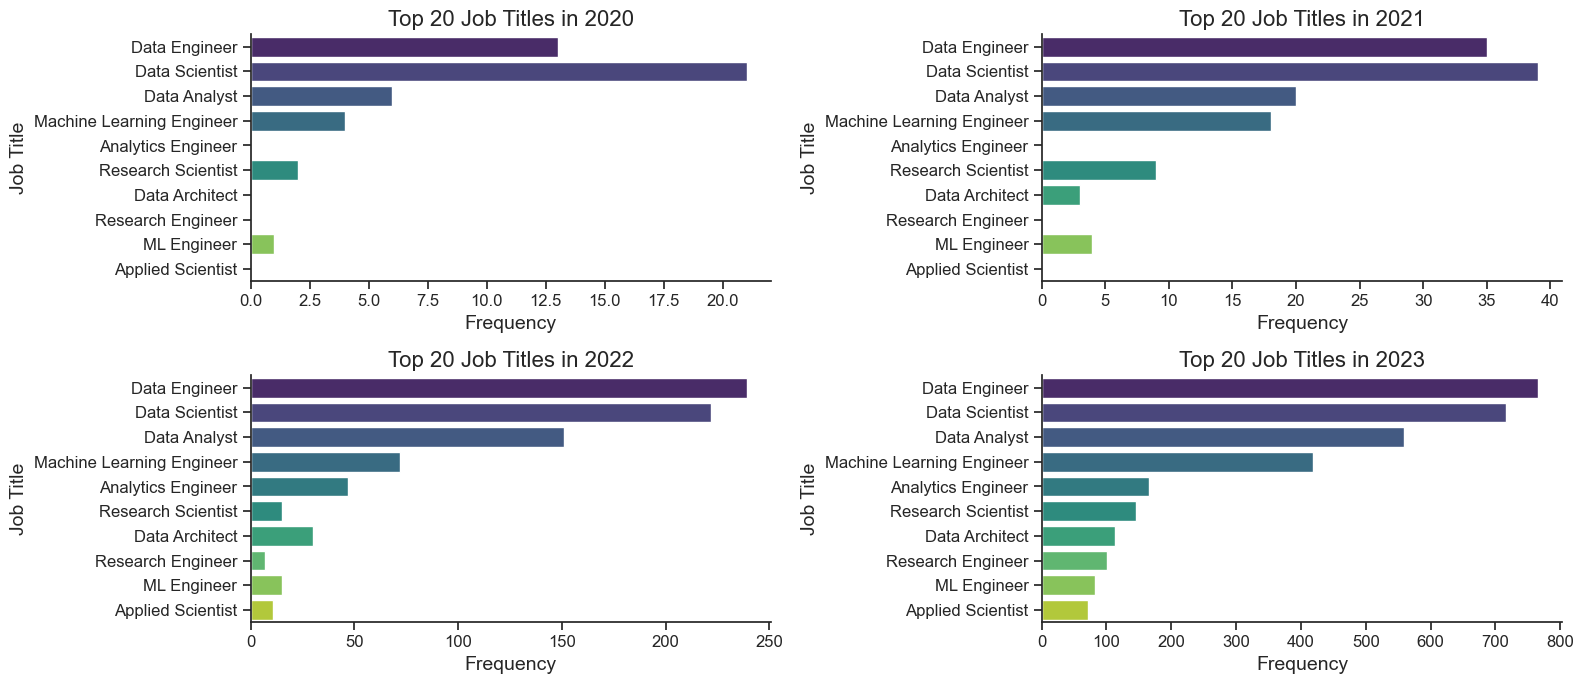

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

# Выбор топ-20 вакансий по количеству записей
top_20_job_titles = salaries['Job Title'].value_counts().head(10).index
filtered_data_top_20_jobs = salaries[salaries['Job Title'].isin(top_20_job_titles)]

# Создание подграфиков для каждого года (кроме 2024 года)
years = filtered_data_top_20_jobs['Year'].unique()
years = sorted(years[years != 2024])  # Исключаем 2024 год и сортируем

fig, axes = plt.subplots(2, 2, figsize=(16, 7))  # Создание сетки из 4 графиков (2x2)
axes = axes.flatten()

for i, year in enumerate(years[:4]):  # Ограничение до 4 лет
    ax = axes[i]
    sns.countplot(data=filtered_data_top_20_jobs[filtered_data_top_20_jobs['Year'] == year],
                  y='Job Title',
                  palette='viridis',
                  order=filtered_data_top_20_jobs['Job Title'].value_counts().index,
                  ax=ax)
    ax.set_title(f'Top 20 Job Titles in {year}', fontsize=16)
    ax.set_xlabel('Frequency', fontsize=14)
    ax.set_ylabel('Job Title', fontsize=14)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    sns.despine(ax=ax)

plt.tight_layout()
plt.show()

The graphs show the top 20 job titles by frequency for the years 2020-2023. Note that 2024 was not included due to insufficient data.

	1.	2020-2021:
	•	Data Engineer and Data Scientist consistently lead in the number of records.
	•	Increasing popularity of Data Analyst and Machine Learning Engineer.
	2.	2022-2023:
	•	The demand for Data Engineer and Data Scientist continues to grow.
	•	Significant growth in Data Analyst and Machine Learning Engineer positions.
	•	New popular job titles include Data Architect and Research Engineer.

Conclusion:

Data Engineer and Data Scientist remain the most in-demand job titles. Analytics and machine learning positions are also gaining popularity. 

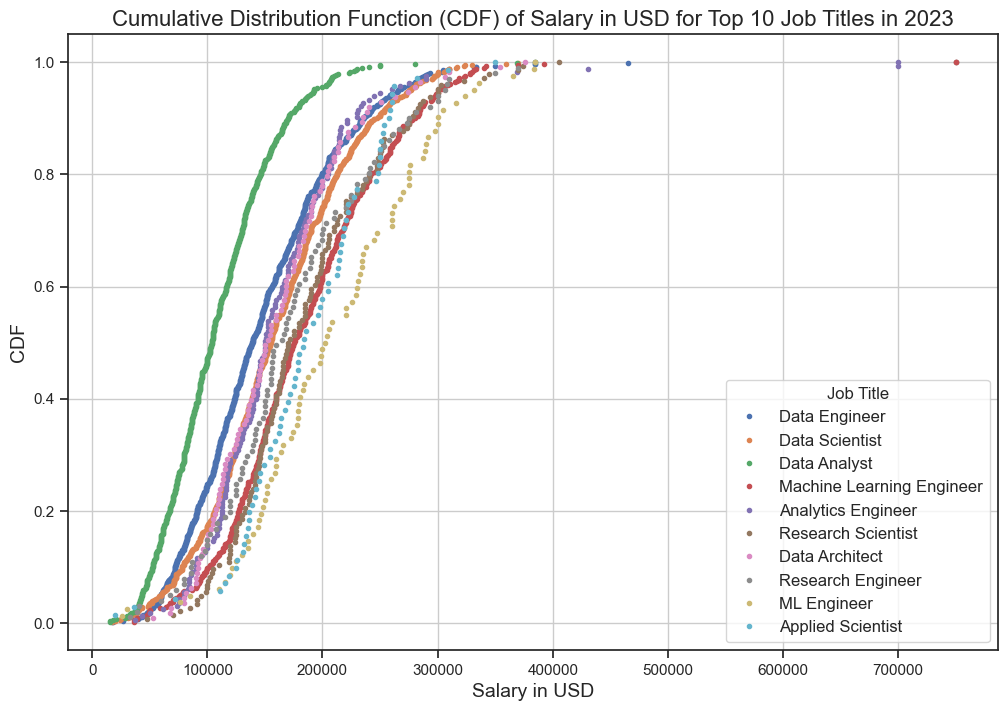

In [278]:
import numpy as np
import matplotlib.pyplot as plt

# Selecting the top 10 vacancies by number of entries for 2023
salaries_2024 = salaries[salaries['Year'] == 2023]
top_10_job_titles_2024 = salaries_2024['Job Title'].value_counts().head(10).index
filtered_data_top_10_jobs_2024 = salaries_2024[salaries_2024['Job Title'].isin(top_10_job_titles_2024)]

# Create a CDF for each vacancy from the top 10
plt.figure(figsize=(12, 8))

for job_title in top_10_job_titles_2024:
    job_data = filtered_data_top_10_jobs_2024[filtered_data_top_10_jobs_2024['Job Title'] == job_title]['Salary in USD']
    sorted_salaries = np.sort(job_data)
    yvals = np.arange(1, len(sorted_salaries) + 1) / len(sorted_salaries)
    plt.plot(sorted_salaries, yvals, marker='.', linestyle='none', label=job_title)

# Plot
plt.xlabel('Salary in USD', fontsize=14)
plt.ylabel('CDF', fontsize=14)
plt.title('Cumulative Distribution Function (CDF) of Salary in USD for Top 10 Job Titles in 2023', fontsize=16)
plt.legend(title='Job Title', fontsize=12)
plt.grid(True)
plt.show()

In 2023, the CDF analysis of the top 10 job titles shows that salaries vary significantly across roles. “Data Engineers” and “Data Scientists” are the most frequent job titles, with a broad range of salaries. Most salaries cluster between $100,000 - $200,000 USD, with some roles reaching up to $600,000 USD. This highlights a substantial variation in compensation within the data science field.

### Visualizing correlations

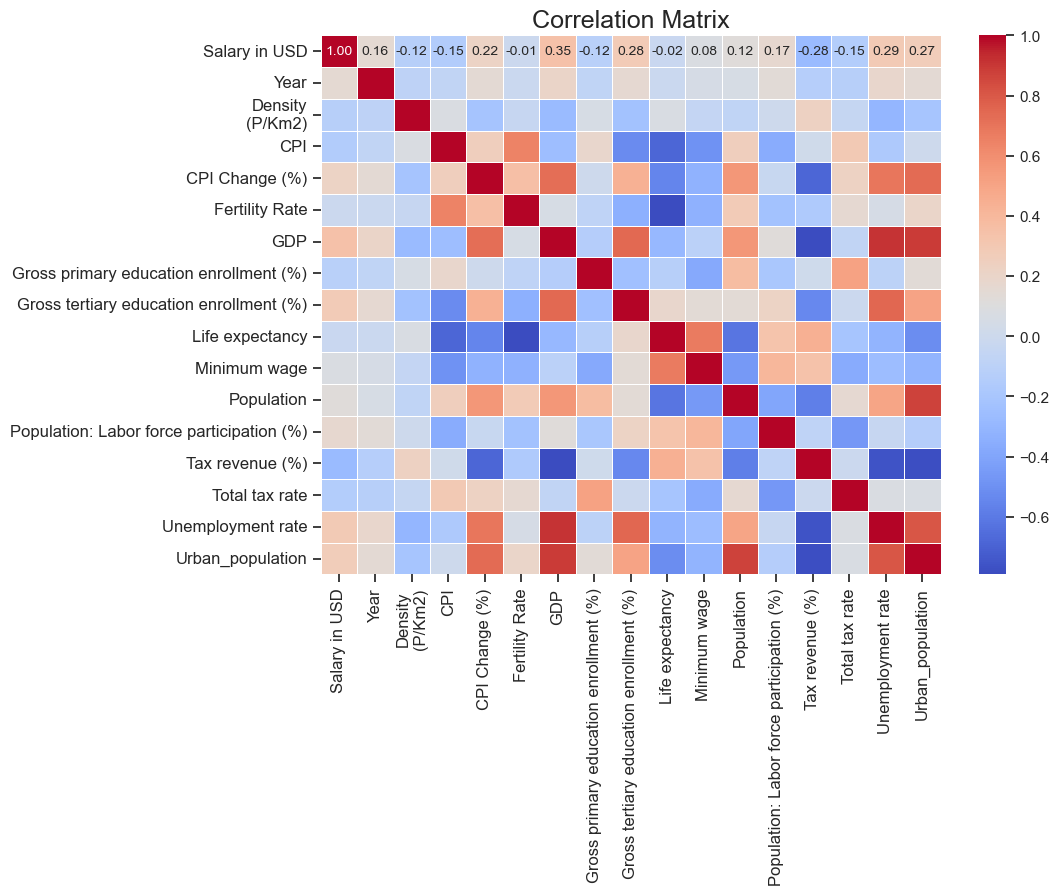

In [218]:
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix', fontsize=18)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.show()

From the correlation matrix, “Salary in USD” shows the highest positive correlation with “Minimum wage” (0.35) and “Population: Labor force participation (%)” (0.28). This suggests that higher salaries are associated with higher minimum wages and greater labor force participation rates. Conversely, “Salary in USD” is negatively correlated with “Unemployment rate” (-0.15) and “CPI Change (%)” (-0.12), indicating that higher salaries are typically found in countries with lower unemployment rates and more stable consumer price indexes.

## 6. Data Visualization

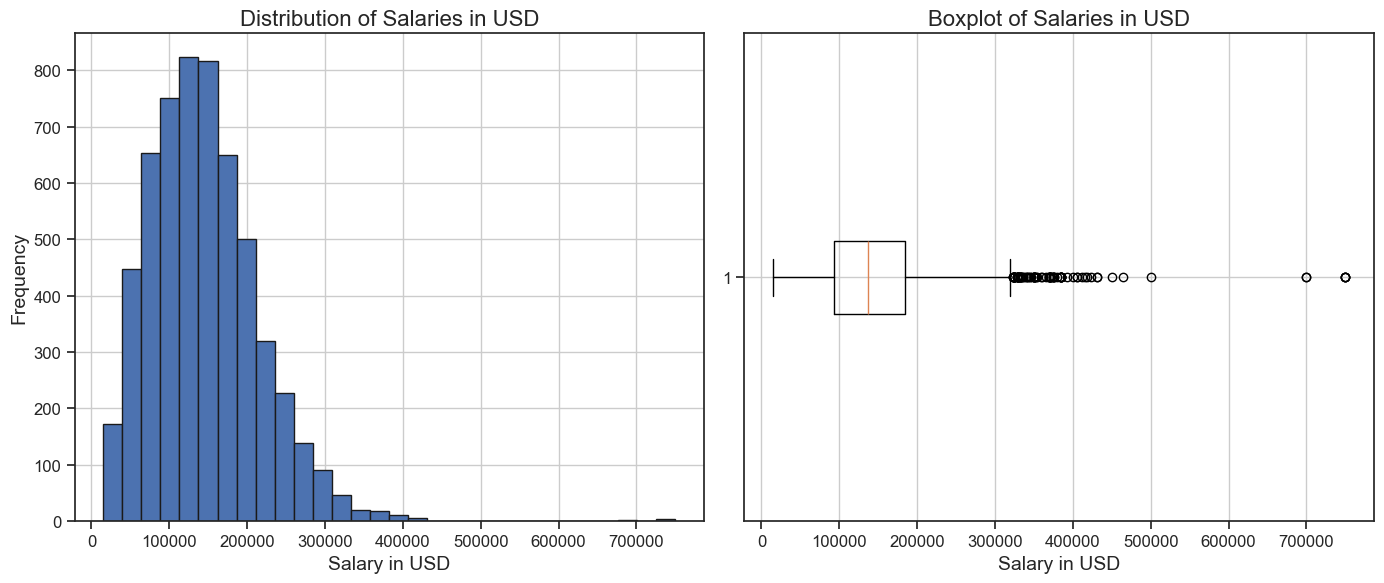

In [221]:
# Histograms and Boxplot for Salaries in USD
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Histogram
axes[0].hist(salaries['Salary in USD'], bins=30, edgecolor='k')
axes[0].set_title('Distribution of Salaries in USD', fontsize=16)
axes[0].set_xlabel('Salary in USD', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].grid(True)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Boxplot
axes[1].boxplot(salaries['Salary in USD'], vert=False)
axes[1].set_title('Boxplot of Salaries in USD', fontsize=16)
axes[1].set_xlabel('Salary in USD', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].grid(True)

plt.tight_layout()
plt.show()

The majority of salaries in USD are concentrated between $50,000 and $200,000, with a peak around $100,000 to $150,000. The distribution is right-skewed, indicating that there are some higher salaries extending beyond $200,000, but these are less common.

The boxplot confirms this skewness and highlights the presence of outliers, which are salaries significantly higher than the upper quartile. These outliers extend up to $750,000. The median salary is around $137,500, with the interquartile range (IQR) falling between $93,725 and $185,000.


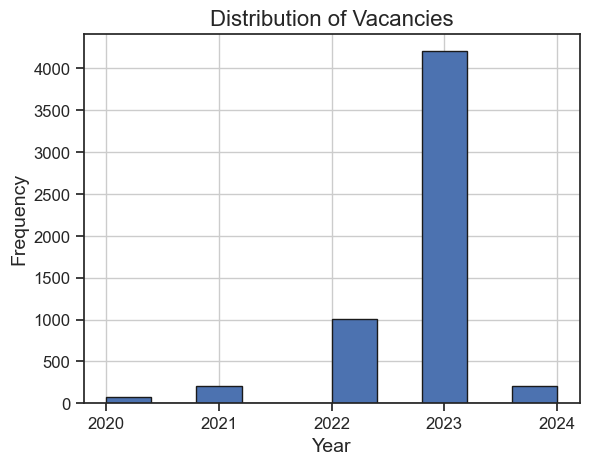

In [239]:
# Histogram for 'Year'
plt.hist(salaries['Year'], edgecolor='k')
plt.title('Distribution of Vacancies', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.xticks([2020, 2021, 2022, 2023, 2024], fontsize=12) 
plt.yticks(fontsize=12)
plt.show()


•	The majority of vacancies are concentrated in 2023.

	•	2020, 2021, and 2024 show considerably fewer vacancies.
	•	The data for 2024 may not be fully collected yet.

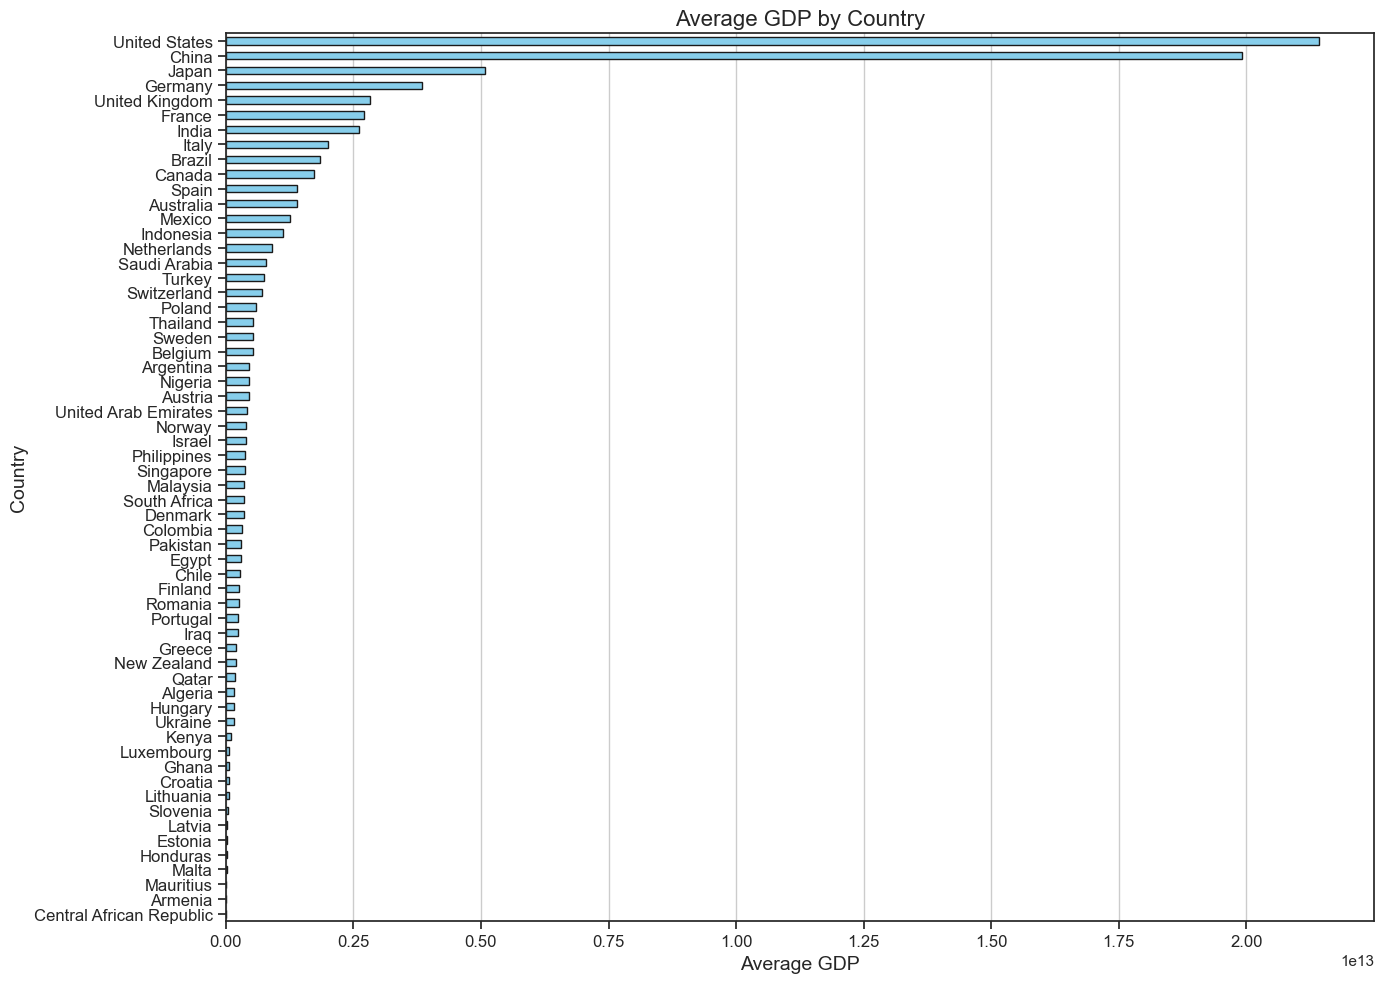

In [245]:
import matplotlib.pyplot as plt

# Group by countries and calculate mean GDP
gdp_by_country = salaries.groupby('Country')['GDP'].mean().sort_values()

# Create a bar plot with inverted axes
plt.figure(figsize=(14, 10))
gdp_by_country.plot(kind='barh', edgecolor='k', color='skyblue')
plt.title('Average GDP by Country', fontsize=16)
plt.ylabel('Country', fontsize=14)
plt.xlabel('Average GDP', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

The bar chart, sorted by average GDP, highlights that the United States, China, and Japan have the highest GDP among the countries analyzed. This indicates a potential link between a country’s economic strength and the salaries offered for data science positions.

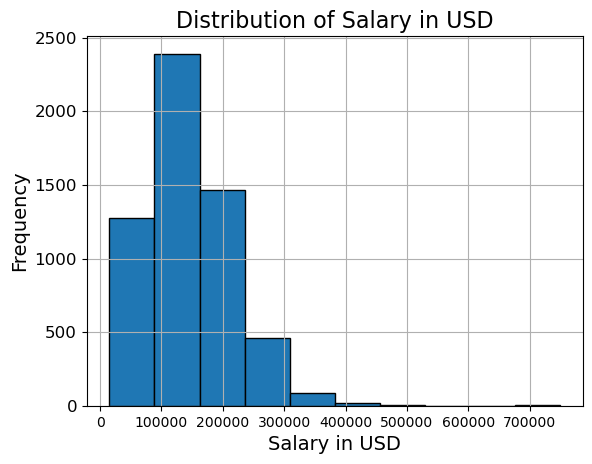

In [250]:
# Histogram for 'Salary in USD'
plt.hist(salaries['Salary in USD'], edgecolor='k')
plt.title('Distribution of Salary in USD', fontsize=16)
plt.xlabel('Salary in USD', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.yticks(fontsize=12)
plt.show()

The distribution is right-skewed, indicating that while most data science positions offer competitive salaries, there are a few positions that pay significantly higher, stretching up to $750,000. This right-skewness suggests that the field has potential for high earnings, especially for top-tier positions or highly experienced professionals.

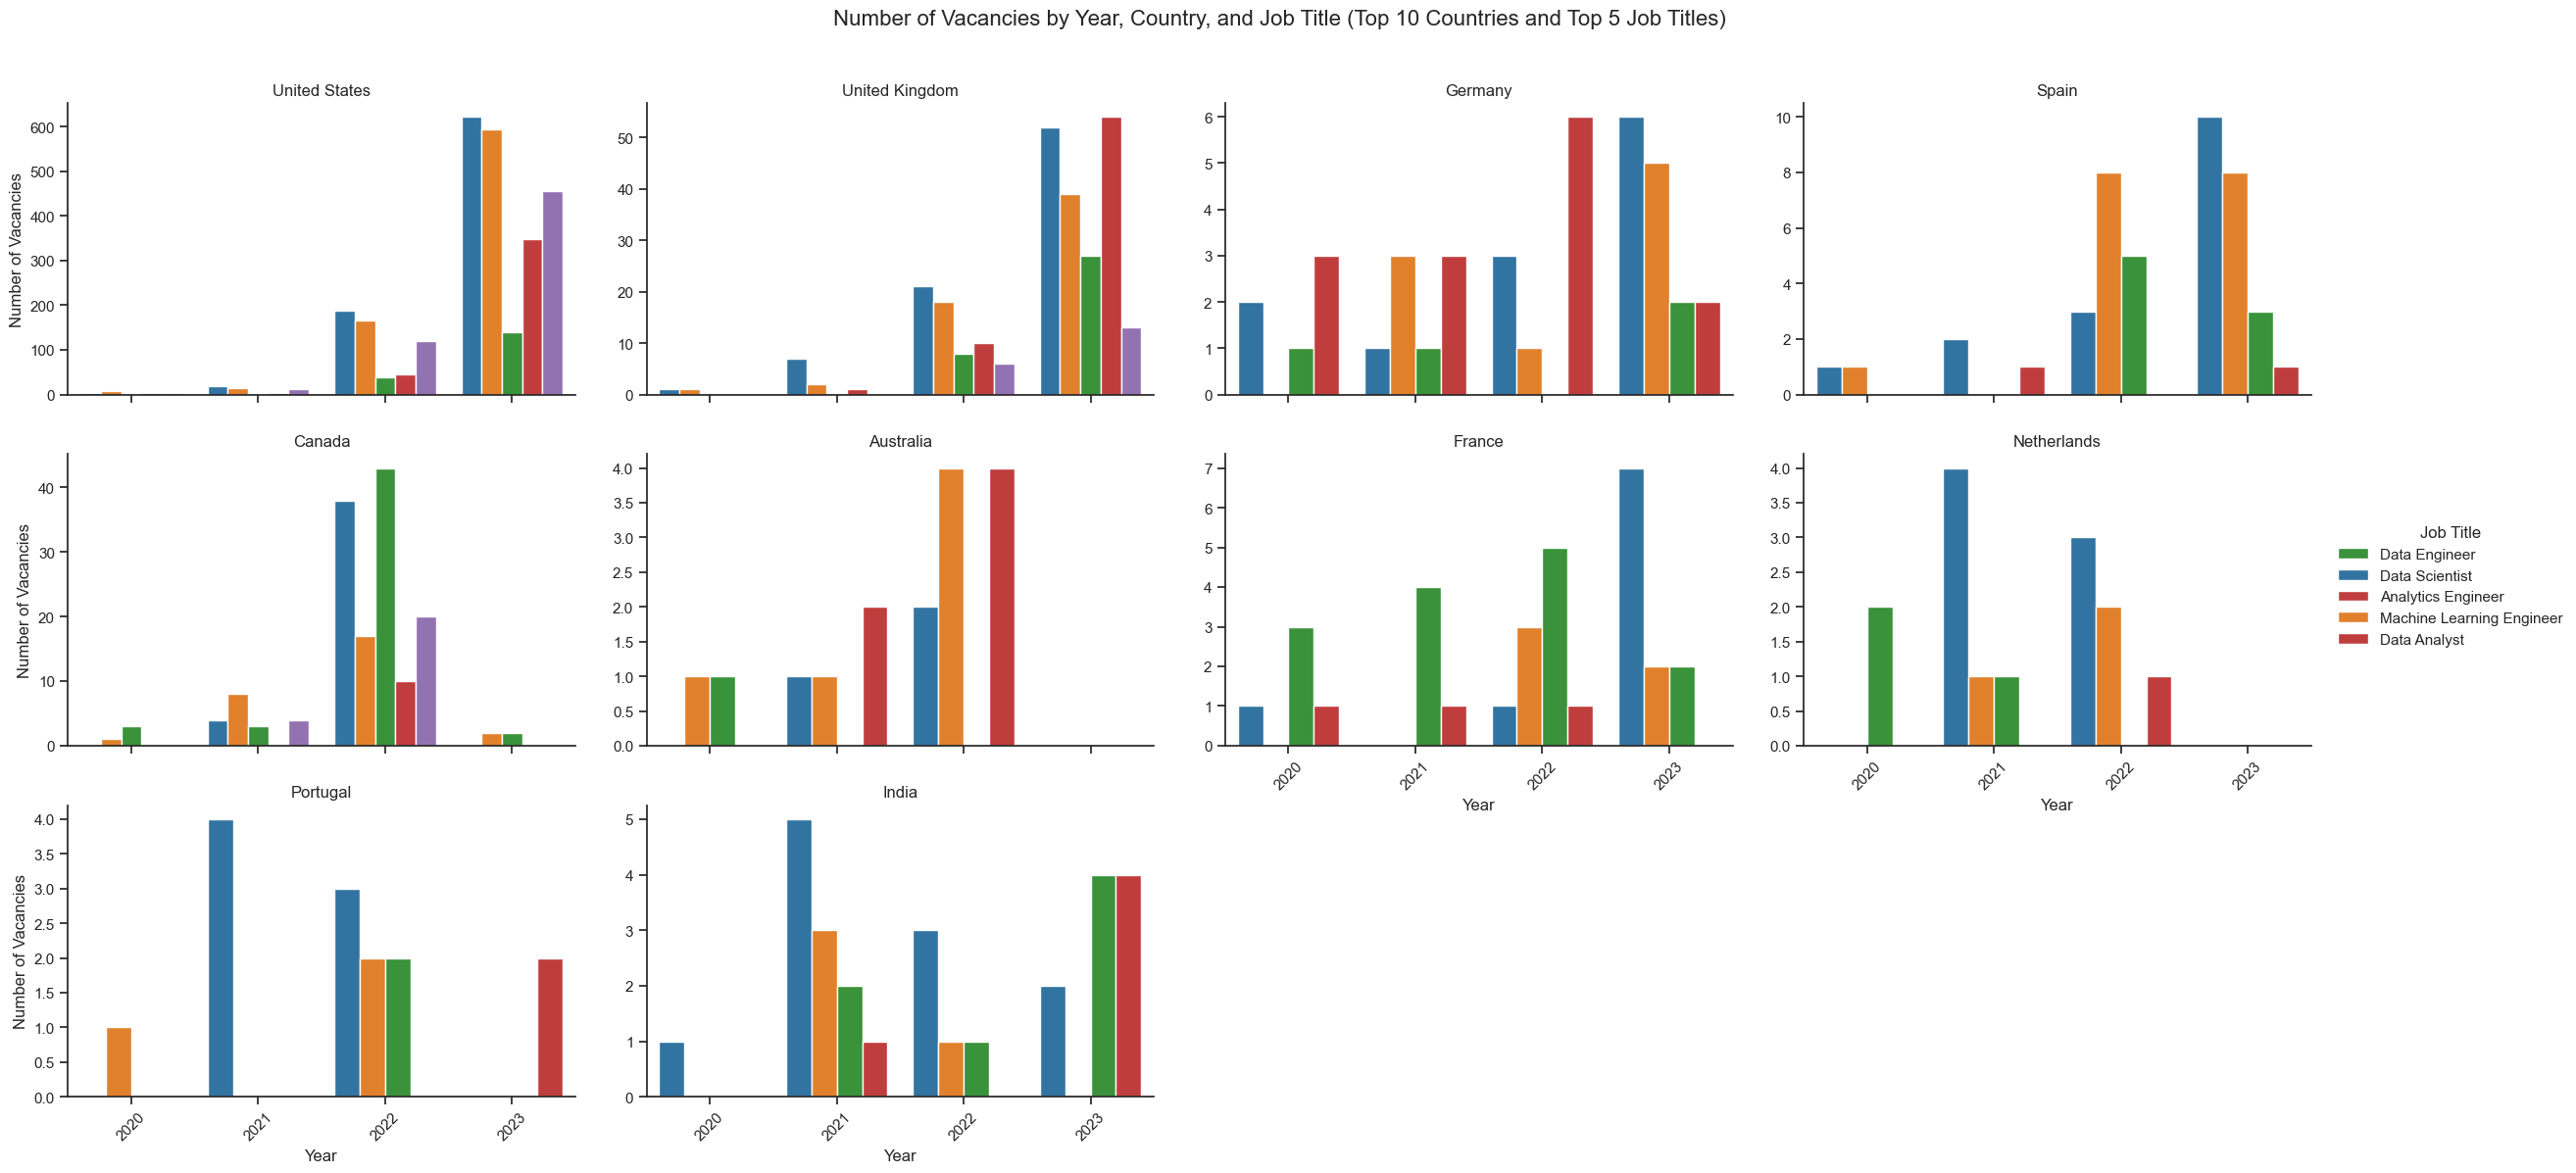

In [64]:
# Выбор топ-10 стран по количеству вакансий
top_countries = salaries['Country'].value_counts().head(10).index
filtered_data = salaries[salaries['Country'].isin(top_countries)]

# Выбор топ-5 типов вакансий
top_job_titles = filtered_data['Job Title'].value_counts().head(5).index
filtered_data = filtered_data[filtered_data['Job Title'].isin(top_job_titles)]

# Создание FacetGrid для количества вакансий в зависимости от года, страны и типа вакансий
g = sns.FacetGrid(filtered_data, col='Country', col_wrap=4, height=4, aspect=1.5, sharey=False)
g.map_dataframe(sns.countplot, x='Year', hue='Job Title', palette='tab10', dodge=True)
g.add_legend(title='Job Title')

# Настройка заголовков и меток
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Number of Vacancies by Year, Country, and Job Title (Top 10 Countries and Top 5 Job Titles)', fontsize=16)
g.set_axis_labels('Year', 'Number of Vacancies')
g.set_titles('{col_name}')

# Поворот меток оси X
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.show()

This visualization shows the distribution of vacancies over the years for the top 10 countries and the top 5 job titles from 2020 to 2023. Here are some key points:

	1.	United States:
	•	Dominates the number of vacancies, especially in 2023.
	•	The most prominent roles are Data Engineer, Data Scientist, and Data Analyst.
	2.	United Kingdom, Germany, and Canada:
	•	Show a steady increase in vacancies over the years.
	•	The roles of Data Engineer and Data Scientist are consistently high.
	3.	Other Countries:
	•	Countries like Spain, Australia, and India show a moderate number of vacancies, with a noticeable peak in 2023.
	•	There is a diverse distribution of roles across these countries, indicating a broad demand for different data science positions.
	4.	Trend:
	•	The general trend across all countries is an increase in the number of vacancies, with a significant spike in 2023. This indicates a growing demand for data science professionals globally.

In [262]:
# Grouping data by vacancies and calculating the average and standard deviation for each group
grouped = salaries.groupby('Job Title')['Salary in USD'].agg(['mean', 'std', 'count']).reset_index()
grouped = grouped[grouped['count'] > 1]  # Eliminate vacancies with only one variable
# Расчет доверительных интервалов для средней зарплаты по вакансиям
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)

grouped['margin_of_error'] = z_score * (grouped['std'] / np.sqrt(grouped['count']))
grouped['confidence_interval_lower'] = grouped['mean'] - grouped['margin_of_error']
grouped['confidence_interval_upper'] = grouped['mean'] + grouped['margin_of_error']

# Output data with confidence intervals
grouped[['Job Title', 'mean', 'confidence_interval_lower', 'confidence_interval_upper']]

,Job Title,mean,confidence_interval_lower,confidence_interval_upper
0,AI Architect,256416.909091,194992.110084,317841.708098
1,AI Developer,151140.888889,113406.963134,188874.814643
2,AI Engineer,164162.608696,138220.550843,190104.666548
4,AI Programmer,72858.800000,47035.790167,98681.809833
5,AI Research Engineer,63481.600000,16436.393719,110526.806281
...,...,...,...,...
127,Research Engineer,172876.428571,159272.712069,186480.145074
128,Research Scientist,175801.130682,164935.139026,186667.122337
130,Software Data Engineer,111627.666667,14201.960242,209053.373091
131,Staff Data Analyst,79917.000000,-19594.788252,179428.788252


This code provides a table with the average salary for each job and the corresponding confidence intervals. This approach allows the use of confidence intervals to estimate the uncertainty in predictions of average salaries for job openings using the central limit theorem and z-score.

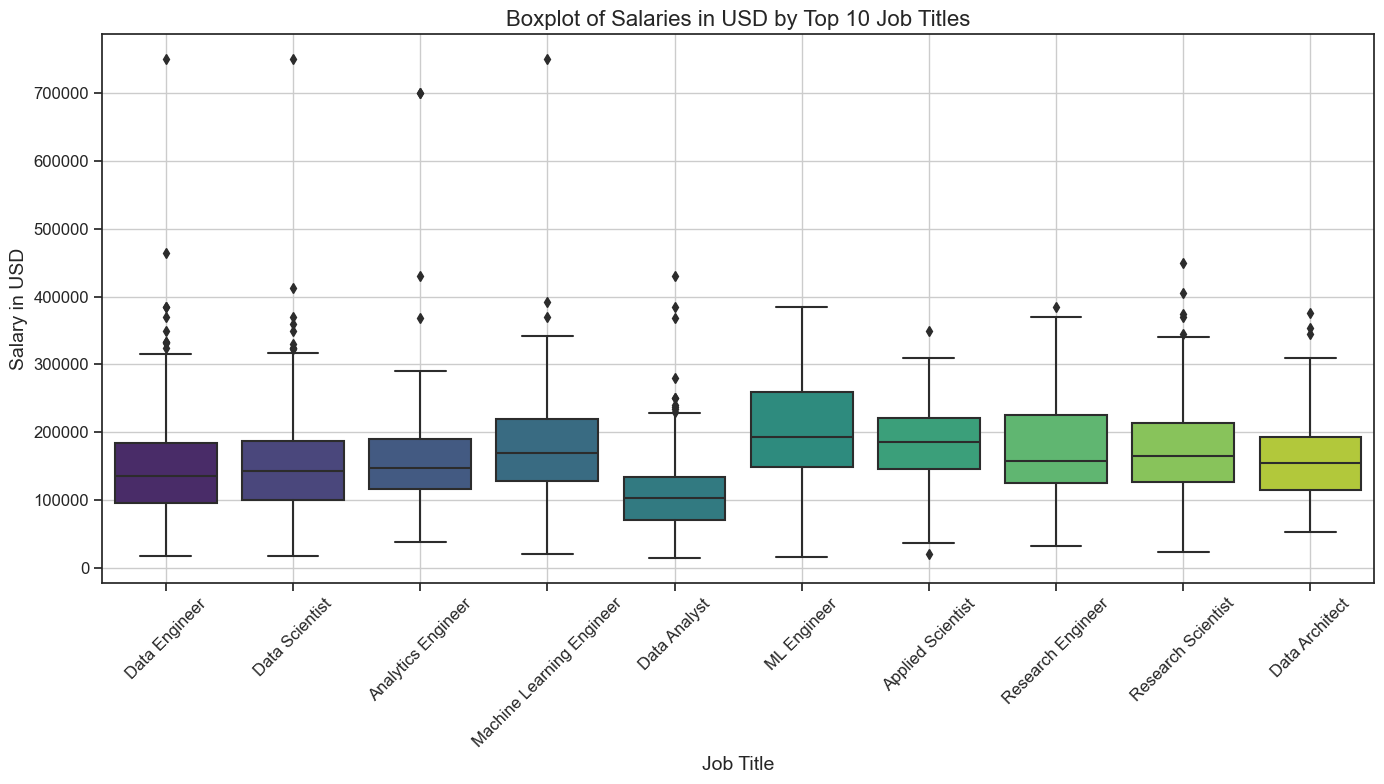

In [267]:
# Selecting the top 10 vacancies by number of entries
top_job_titles = salaries['Job Title'].value_counts().head(10).index
filtered_data_top_jobs = salaries[salaries['Job Title'].isin(top_job_titles)]

# Create a boxplot for the top 10 vacancies
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_data_top_jobs, x='Job Title', y='Salary in USD', palette='viridis')
plt.title('Boxplot of Salaries in USD by Top 10 Job Titles', fontsize=16)
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Salary in USD', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

The boxplot provides a visual representation of the distribution of salaries across the top 10 job titles in 2023. Here are some key observations:

	1.	Median Salaries:
	•	The median salary for Data Engineers and Data Scientists is similar, around $140,000.
	•	Machine Learning Engineers and Research Engineers have slightly higher median salaries compared to Data Analysts and Analytics Engineers.
	2.	Salary Range:
	•	All job titles show a wide range of salaries, indicating significant variation within each role.
	•	Data Engineers and Data Scientists have some of the highest maximum salaries, reaching up to $600,000.
	3.	Outliers:
	•	There are several outliers in most job titles, particularly in Data Engineer, Data Scientist, and Machine Learning Engineer roles. This indicates that while most salaries are within a certain range, there are some exceptionally high earners.

## Summary

	Salary Distribution:
	•	The distribution of salaries shows a positive skew, with most salaries clustering around the lower end but with a long tail of higher salaries.
	2.	Correlation Analysis:
	•	Salary in USD has a moderate positive correlation with factors like CPI and minimum wage, and a negative correlation with unemployment rate and fertility rate.
	3.	Job Vacancies:
	•	There is a significant increase in job vacancies in 2023, especially in the United States, United Kingdom, Germany, and Canada.
	•	Data Engineer and Data Scientist are consistently high-demand roles across all countries.
	4.	GDP Analysis:
	•	The United States, China, and Japan have the highest average GDP, which could correlate with the higher salaries observed in these countries.
	5.	Future Outlook:
	•	The trend indicates a growing demand for data science roles globally, with increasing salaries and job vacancies.
	•	The data for 2024 is limited, and further analysis will be needed as more data becomes available.

These insights can help professionals in the data science field make informed career decisions and understand the global trends in their industry.